In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/image_recongnition_cnn_cifar')



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from models.transfer_learning_ResNet import ResNet50_pretrained
from utils.train_eval import train_eval_model
from utils.plot_metric import plot_metric
import numpy as np

In [ ]:
model =ResNet50_pretrained(
    hidden_features=16,
    num_classes=100,
    dropout=0.5
)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
epochs = 20
lr = 1e-4
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
train_losses, train_accuracies, test_losses, test_accuracies = train_eval_model(
    model,
    optimizer=optimizer,
    criterion=criterion,
    epochs=epochs,
    dataset_name='cifar100',
    img_res=32,
    batch_size=64,
    device=device
)

Epoch [1/20] - Train Loss: 4.5248 - Train Accuracy: 2.9580%
Epoch [1/20] - Test Loss: 4.2119 - Test Accuracy: 10.9700%
Epoch [2/20] - Train Loss: 4.2683 - Train Accuracy: 7.3500%
Epoch [2/20] - Test Loss: 3.8274 - Test Accuracy: 19.8400%
Epoch [3/20] - Train Loss: 4.0454 - Train Accuracy: 10.9040%
Epoch [3/20] - Test Loss: 3.5412 - Test Accuracy: 26.2700%
Epoch [4/20] - Train Loss: 3.8675 - Train Accuracy: 13.6380%
Epoch [4/20] - Test Loss: 3.2871 - Test Accuracy: 30.1000%
Epoch [5/20] - Train Loss: 3.7134 - Train Accuracy: 15.8120%
Epoch [5/20] - Test Loss: 3.2157 - Test Accuracy: 32.5100%
Epoch [6/20] - Train Loss: 3.5994 - Train Accuracy: 17.2760%
Epoch [6/20] - Test Loss: 3.0881 - Test Accuracy: 34.2600%
Epoch [7/20] - Train Loss: 3.4992 - Train Accuracy: 18.7480%
Epoch [7/20] - Test Loss: 2.9384 - Test Accuracy: 37.3100%
Epoch [8/20] - Train Loss: 3.3859 - Train Accuracy: 20.4780%
Epoch [8/20] - Test Loss: 2.7998 - Test Accuracy: 39.2500%
Epoch [9/20] - Train Loss: 3.2968 - Train 

In [ ]:
train_accuracies = np.array(train_accuracies)
test_acc = np.array(test_accuracies)
epochs = np.arange(0, len(train_accuracies))

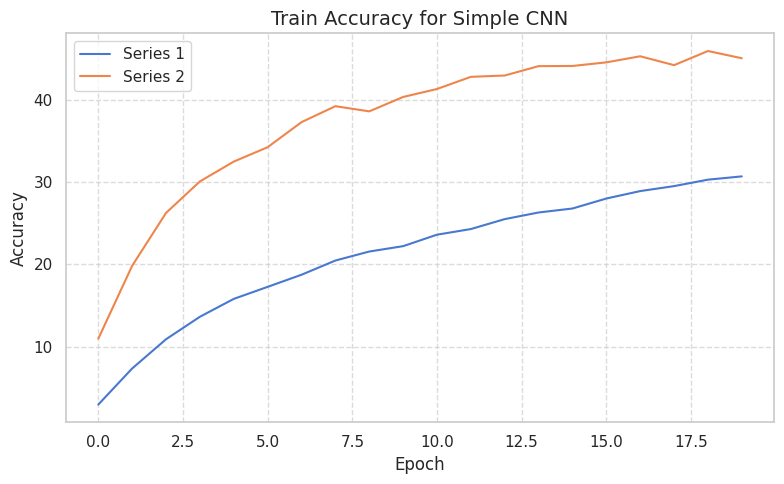

In [ ]:

plot_metric(
    x=epochs,
    y_list=[train_accuracies, test_acc],
    y_label='Accuracy',
    title='Train Accuracy for Simple CNN',
    labels=None
)